<div class="output_png output_subarea output_execute_result">
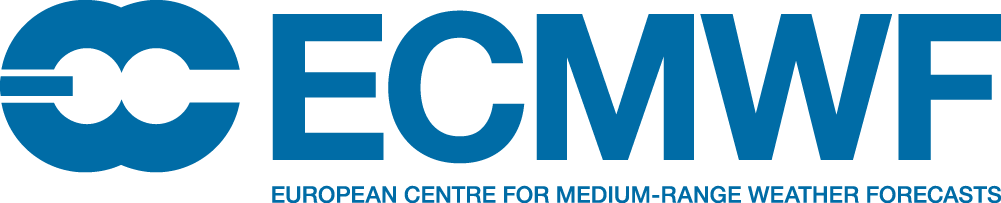
</div>

# 	Vorticity or divergence and wind at 700 hPa

This notebook will provide you guidance how to explore and plot ECMWF open dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://charts.ecmwf.int/products/medium-rv-div-uv  


<div class="output_png output_subarea output_execute_result">
<center>
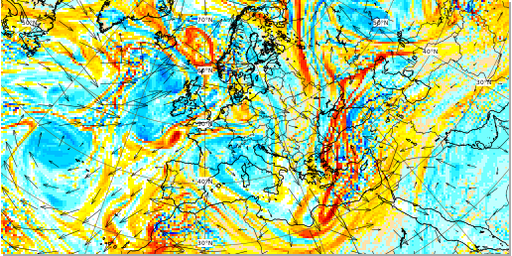</center>
</div>

The full list of available Open data products can be found [here](https://www.ecmwf.int/en/forecasts/datasets/open-data), and more information can be found in the [User documentation](https://confluence.ecmwf.int/display/DAC/ECMWF+open+data%3A+real-time+forecasts+from+IFS+and+AIFS).  

Access to ECMWF Open data is governed by the Creative Commons CC-BY-4.0 licence and associated [Terms of Use](https://apps.ecmwf.int/datasets/licences/general/).  

<sub> In applying this licence, ECMWF does not waive the privileges and immunities granted to it by virtue of its status as an intergovernmental organisation nor does it submit to any jurisdiction </sub>

To find out how to obtain the access to the full forecast dataset at higher resolution please visit our [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product takes in input 4 parameters :

* [Vorticity (relative)](https://codes.ecmwf.int/grib/param-db/138)
* [Divergence](https://codes.ecmwf.int/grib/param-db/155)
* [U component of wind](https://codes.ecmwf.int/grib/param-db/131)
* [V component of wind](https://codes.ecmwf.int/grib/param-db/132)

In this example, we will use: 
- [**ecmwf.opendata**](https://github.com/ecmwf/ecmwf-opendata) Client to download the data
- [**Metview**](https://metview.readthedocs.io/en/latest/) library to read, process and plot the data 

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> If you are running the notebook on MyBinder or already have the libraries installed, go directly to importing the libraries.
</div>
<div class="alert alert-block alert-info">
<b>Note:</b> If you don't have these libraries installed, click on three dots below, uncomment the code and run the next cell.
</div>

In [1]:
#!pip install ecmwf-opendata metview metview-python

In [2]:
import metview as mv
from ecmwf.opendata import Client

In [3]:
client = Client("ecmwf", beta=True)

In [4]:
parameters = ['vo','d', 'u', 'v']
filename = 'medium-rv-div-uv.grib'
filename

'medium-rv-div-uv.grib'

Setting date to 0 will download today's data. 
Removing date and time altogether from the request will download the latest data.  
Try commenting out date and time to download latest forecast!

In [5]:
client.retrieve(
    date=0,
    time=0,
    step=12,
    stream="oper",
    type="fc",
    levtype="pl",
    levelist=[700],
    param=parameters,
    target=filename
)

20241224000000-12h-oper-fc.grib2:   0%|          | 0.00/3.88M [00:00<?, ?B/s]

## Reading and processing the data
Now we can use **ecmwf.data** to read the files.

In [6]:
data = mv.read(filename)

The **describe()** function will give us the overview of the dataset.

In [7]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
d,isobaricInhPa,700,20241224,0,12,None,155,od,oper,fc,0001
u,isobaricInhPa,700,20241224,0,12,None,131,od,oper,fc,0001
v,isobaricInhPa,700,20241224,0,12,None,132,od,oper,fc,0001
vo,isobaricInhPa,700,20241224,0,12,None,138,od,oper,fc,0001


And an overview of one parameter, where we can see more information, such as units or type of level.

In [8]:
data.describe('vo')

shortName,vo
name,Vorticity (relative)
paramId,138
units,s**-1
typeOfLevel,isobaricInhPa
level,700
date,20241224
time,0
step,12
number,None
class,od


We can use **ls()** function to list all the fields in the file we downloaded.

In [9]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,vo,isobaricInhPa,700,20241224,0,12,fc,None,regular_ll
1,ecmf,d,isobaricInhPa,700,20241224,0,12,fc,None,regular_ll
2,ecmf,v,isobaricInhPa,700,20241224,0,12,fc,None,regular_ll
3,ecmf,u,isobaricInhPa,700,20241224,0,12,fc,None,regular_ll


Our grib file has all the parameters in it.  
We can filter each parameter, using the **select()** method.

In [10]:
vo = data.select(shortName = 'vo')
vo.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
vo,isobaricInhPa,700,20241224,0,12,None,138,od,oper,fc,0001


In [11]:
d = data.select(shortName = 'd')
d.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
d,isobaricInhPa,700,20241224,0,12,None,155,od,oper,fc,0001


In [12]:
u = data.select(shortName = 'u')
v = data.select(shortName = 'v')
u.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
u,isobaricInhPa,700,20241224,0,12,None,131,od,oper,fc,0001


In order to match the units in the Open charts plot, we need to multiply the data with 100000.


In [13]:
d *= 100000

We need to create a wind vector field for the visualisation, as well.

In [14]:
wind_vector = mv.grib_vectors(u_component = u, v_component = v)

Now, we can plot the data on the map.   
Each parameter has a dedicated style used at ECMWF web open charts.  

However, divergence and relative vorticyity have the same style.  
First, we will plot divergence with the wind

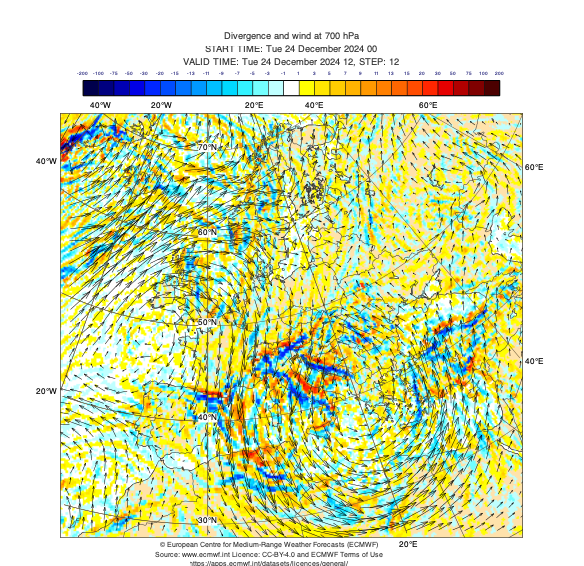

In [15]:
# define coastlines
coast = mv.mcoast(
    map_coastline_colour="charcoal",
    map_coastline_resolution="medium",
    map_coastline_land_shade="on",
    map_coastline_land_shade_colour="cream",
    map_coastline_sea_shade="off",
    map_boundaries="on",
    map_boundaries_colour= "charcoal",
    map_boundaries_thickness = 1,
    map_disputed_boundaries = "off",
    map_grid_colour="tan",
    map_label_height=0.35,
)

# define view
view = mv.geoview(
    area_mode="name",
    area_name="europe",
    subpage_clipping="on",
    coastlines=coast
)

#define styles
d_shade = mv.mcont(legend= "on",
                contour_automatics_settings = "style_name",
                contour_style_name = "sh_blured_fM50t50lst_cell")

wind_arrows = mv.mwind(
    wind_thinning_factor=5, wind_arrow_colour="black"
)

title = mv.mtext(
    text_lines=["Divergence and wind at 700 hPa", 
                "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=d'/> ",
                "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=d'/>, STEP: <grib_info key='step' where='shortName=d' />"],
    text_font_size=0.4,
    text_colour         = 'charcoal')

ecmwf_text = mv.mtext(    
    text_lines          = ["© European Centre for Medium-Range Weather Forecasts (ECMWF)",
                           "Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use",
                            "https://apps.ecmwf.int/datasets/licences/general/"],
    text_justification  = 'center',
    text_font_size      = 0.3,
    text_mode           = "positional",
    text_box_x_position = 6.,
    text_box_y_position = -0.2,
    text_box_x_length   = 8,
    text_box_y_length   = 2,
    text_colour         = 'charcoal')

# generate plot
mv.setoutput('jupyter', plot_widget=False)
mv.plot(view, d, d_shade, wind_vector, wind_arrows, title, ecmwf_text)

And the vorticity in the end:

In [16]:
vo *= 100000

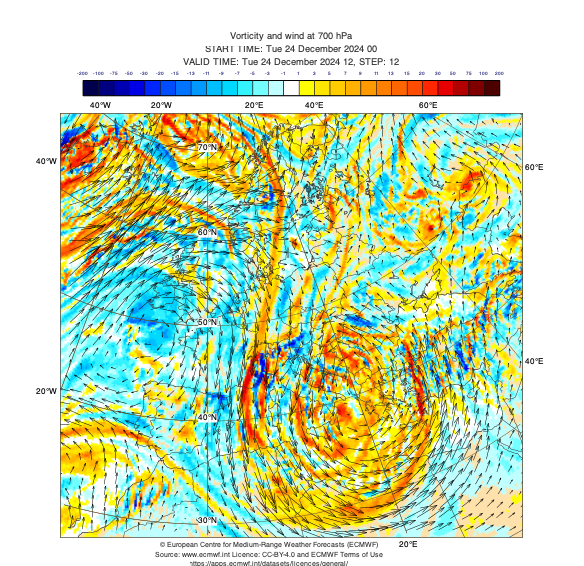

In [17]:
# define coastlines
coast = mv.mcoast(
    map_coastline_colour="charcoal",
    map_coastline_resolution="medium",
    map_coastline_land_shade="on",
    map_coastline_land_shade_colour="cream",
    map_coastline_sea_shade="off",
    map_boundaries="on",
    map_boundaries_colour= "charcoal",
    map_boundaries_thickness = 1,
    map_disputed_boundaries = "off",
    map_grid_colour="tan",
    map_label_height=0.35,
)

# define view
view = mv.geoview(
    area_mode="name",
    area_name="europe",
    subpage_clipping="on",
    coastlines=coast
)

#define styles
vo_shade = mv.mcont(legend= "on",
                contour_automatics_settings = "style_name",
                contour_style_name = "sh_blured_fM50t50lst_cell")

wind_arrows = mv.mwind(
    wind_thinning_factor=5, wind_arrow_colour="black"
)

title = mv.mtext(
    text_lines=["Vorticity and wind at 700 hPa", 
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=vo' /> ",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=vo' />, STEP: <grib_info key='step' where='shortName=vo' />"],
    text_font_size=0.4,
    text_colour         = 'charcoal')

ecmwf_text = mv.mtext(    
    text_lines          = ["© European Centre for Medium-Range Weather Forecasts (ECMWF)",
                           "Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use",
                            "https://apps.ecmwf.int/datasets/licences/general/"],
    text_justification  = 'center',
    text_font_size      = 0.3,
    text_mode           = "positional",
    text_box_x_position = 6.,
    text_box_y_position = -0.2,
    text_box_x_length   = 8,
    text_box_y_length   = 2,
    text_colour         = 'charcoal')

# generate plot
mv.setoutput('jupyter', plot_widget=False)
mv.plot(view, vo, vo_shade, wind_vector, wind_arrows, title, ecmwf_text)

To generate the pngs file you can run the following two cells.

In [18]:
png = mv.png_output(
      output_name = "medium-rv-div-uv-d",   # specify relative or full path
      output_title = "medium-rv-div-uv-d",    # title used by a viewer
      output_width = 1000,                 # set width in pixels
)
mv.setoutput(png)
mv.plot(view, d, d_shade, wind_vector, wind_arrows, title, ecmwf_text)

To generate the png file you can run the following cell.

In [19]:
png = mv.png_output(
      output_name = "medium-rv-div-uv-vo",   # specify relative or full path
      output_title = "medium-rv-div-uv-vo",    # title used by a viewer
      output_width = 1000,                 # set width in pixels
)
mv.setoutput(png)
mv.plot(view, vo, vo_shade, wind_vector, wind_arrows, title, ecmwf_text)

Note that plot produced using open data dataset will slightly differ from one from Open Charts. This is due to different resolution of the data.  
Open data is on 0.25x0.25 resolution, while high resolution data is 0.1x0.1 grid.